In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
# Set Random Seed
seed = np.random.seed(123)
sns.set_theme(context = 'paper')
# 1. darkolivegreen
# 2. olive
# 3. darkkhaki
# 4. yellowgreen
# 5. olivedrab

### <span style="color: darkkhaki;"> 

# <span style="color: darkolivegreen;"> Credit Card Fraud Detection</span>

**<span style="color: olive;">Objective**

**<span style="color: olive;">Project Pipeline**
- Import and understand the fraud data
- See if the data has any shortcomings like missing data or imbalance, and then fix them
- Train models on the data using K-Fold Cross Validation
- Evaluate the performance of the models using various metrics
- Rank the model based on their performance and visualize the results

**<span style="color: olive;">i. Data Exploring**
    
**<span style="color: olive;">ii. Pre-processing**

**<span style="color: olive;">iii. Training models**

**<span style="color: olive;">iv. Evaluation**

## <span style="color: olive;">Objective
### <span style="color: darkkhaki;">Credit Card Fraud 
Credit card fraud is the unauthorized use of a credit card to make purchases or withdraw funds.
### <span style="color: darkkhaki;">Source 
The dataset contains transactions made by credit cards in September 2013 by European cardholders, and also available in Kaggle.
### <span style="color: darkkhaki;">Objective
to detect fraudulent credit card transactions or not based on synthetic features

## <span style="color: olive;">i. Data Exploring
- It contains only numerical input variables which are the result of a PCA transformation. 
- There are a total of 31 features in the dataset.
    - `V1, V2, … V28` are the principal components obtained with PCA
    - `Time` contains the seconds elapsed between each transaction and the first transaction in the dataset.
    - `Amount` is the transaction Amount
    - Target: `Class` 1 in case of fraud and 0 otherwise.
### <span style="color: darkkhaki;">a. Load the dataset

In [2]:
df = pd.read_csv('creditcard.csv')
display(df.head())
print('Number column of the dataset:', df.shape[0])
print('Number row of the dataset:', df.shape[1])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Number column of the dataset: 284807
Number row of the dataset: 31


### <span style="color: darkkhaki;"> b. Data Types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### <span style="color: darkkhaki;"> c. Class Distribution

In [4]:
class_counts = df['Class'].value_counts()
display(class_counts)

Class
0    284315
1       492
Name: count, dtype: int64

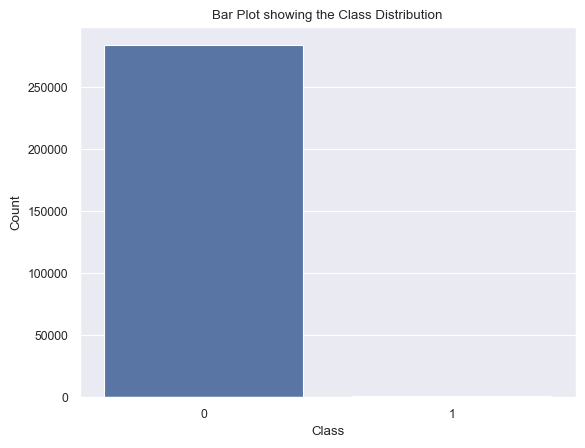

In [5]:
sns.barplot(x=class_counts.index, y=class_counts.values);
plt.title('Bar Plot showing the Class Distribution');
plt.xlabel('Class');
plt.ylabel('Count');

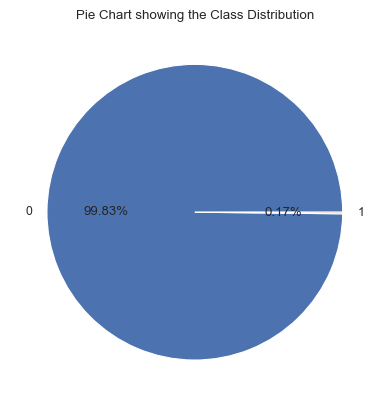

In [6]:
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%');
plt.title('Pie Chart showing the Class Distribution');

As we can see, the dataset is very imbalanced as most of the transaction are **Non-Fraud**. Use this dataset for predictive models might cause a lot of errors because the models will tend to overfit since it gonna assume the most transactions are Non-Fraud

## Preferences
https://builtin.com/data-science/elbow-method#:~:text=The%20elbow%20method%20is%20a%20graphical%20method%20for%20finding%20the,the%20graph%20forms%20an%20elbow.

https://archive.is/fhHGp